How to do PCA for Iris dataset

In [6]:
import pandas as pd
import numpy as np

In [22]:
data = pd.read_csv("F:\M 20.02.2023\downloads\iris\iris.data")

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Lahiru\AppData\Local\Temp\ipykernel_9340\2367245762.py:1: SyntaxWarning: invalid escape sequence '\M'
  data = pd.read_csv("F:\M 20.02.2023\downloads\iris\iris.data")


In [17]:
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [29]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
data.iloc[:,4] = le.fit_transform(data.iloc[:,4])

In [30]:
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


In [23]:
from sklearn.decomposition import PCA

In [31]:
pca = PCA(n_components=2)
new_data = pca.fit_transform(data)
 

In [32]:
new_data.shape

(149, 2)

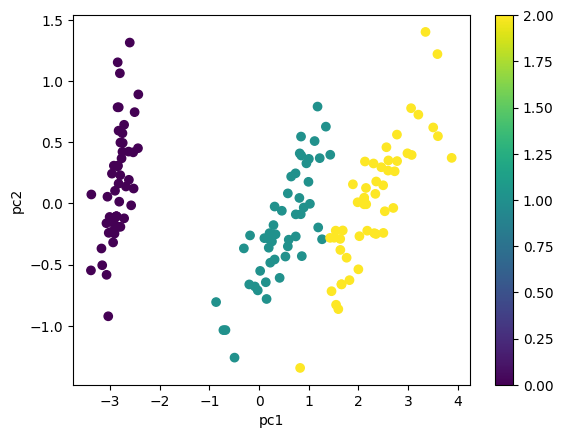

In [40]:
import matplotlib.pyplot as plt 
plt.scatter(new_data[:,0],new_data[:,1],c=data.iloc[:,4])    
plt.xlabel("pc1") 
plt.ylabel("pc2")
plt.colorbar()
plt.show()  

Check PCA performence for another data set

In [41]:
from sklearn.datasets import load_digits

In [42]:
digits = load_digits()

In [43]:
digits.data.shape

(1797, 64)

Feature scaling

In [47]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
new_data = sc.fit_transform(digits.data)    


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, digits.target, test_size=0.2, random_state=0)

In [49]:
X_train.shape

(1437, 64)

In [51]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

import time
start = time.time()
model.fit(X_train,y_train)
end = time.time()
print((end - start)*1000)

41.963815689086914


In [55]:

from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9611111111111111


Using PCA model performence

In [56]:
new_data.shape

(1797, 64)

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
new_data = pca.fit_transform(new_data.data)

In [58]:
new_data.shape

(1797, 10)

In [59]:
X_train,X_test,y_train,y_test = train_test_split(new_data, digits.target, test_size=0.2, random_state=0)        

In [60]:
X_test.shape

(360, 10)

In [61]:
new_model = LogisticRegression()
import time
start = time.time()
new_model.fit(X_train,y_train)
end = time.time()
print((end - start)*1000)

49.06773567199707


In [62]:
y_pred = new_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8833333333333333
